### Question 1

a). A Classification Decision Tree is a type of predictive model used in machine learning, and have the mission of assigning input data points into a specific class. It is done by splitting the data into subsets based on feature values at each node of the tree. This process is represented with a tree-like structure, where Root Node represents the entire dataset and the first decision, Internal Nodes represent decisions based on feature splits and Leaf Nodes reoresent the final classification outcome. Classification Decision Trees are desined to solve classification probelms, such as binary classification or multi-class classification. The real-world application of Classification Decision Trees involves healthcare, finance, marketing, education, e-commerce and enviromental science. It is being used since it is easy to interpret and visualize, requires minimal data preprocessing, captures non-linear relationships and hanldes both numerical and categorical data. 


b). A Classification Decision Tree deals with classification problems and gives output of class label or probability distribution over classes. A multiple linear regression deals with regression problems and generates an output of continuous numericial value. In addition, classification decision tree is able to caputure non-linear relationships and handles both categorical features, the multiple linear regression only captures linear relationship with numerical values indeed. 

https://chatgpt.com/share/673b9506-eb20-800c-a952-37f98ad92741

The session focused on explaining classification decision trees and comparing their predictive mechanisms to multiple linear regression. A classification decision tree is a model used for classification problems, splitting data based on feature values to predict discrete class labels. It is suitable for applications such as healthcare diagnosis, fraud detection, and customer segmentation.

The comparison highlighted that classification decision trees predict class labels or probabilities by traversing a tree structure, while multiple linear regression predicts continuous numerical values using a linear equation. The differences in problem type, output, modeling assumptions, feature handling, and prediction process were outlined.

### Question 2

#### 1). Accuracy 
One of the real world application scenario for this matric would be predicting academic performance for students. Accuray measures the proportion of true result out of the total predictions, and an appropriate scenario would have the characteristic of balance class distribution and all type of errors being concerned. A academic performance matric can be produced in order to predict whether student get pass or not. Considering the both pass and fail classes might occur in similiar proportions satisfying the condition of class distribution balanced, and all misclassification would be equally important.

#### 2). Sensitivity
Sensitibity measures the proportion of actual positives that are correctly identifies and the appropiate scenario would be a high cost for false nagatives leading to the missing true positives becoming more cirtical. One of the real-world application would be screening for cancer patients. Under this scenario, the false nagetive would be missing a patient with cancer, which is a quite high cost for false nagestive, which can lead to severe health consequences for patients. So, it is prioritized to indentify as many true positives (true patient with cancer) as possible.

#### 3). Specificity

Specificity measures the proportion of actual nagatives that are correctly identifies, and an appropriate scenario would be a high cost for false positives leading to the priority of avioding incorrecly classifying nagetives as positives. One of the real-world application would be screening for drugs in professional athletes. In this scenario, the false positive would be incorrectly indengty a athlete who does not use drugs as using drugs, and would cause unjustly harming the athlete's career. So, it is prioritized to ensure the accurate indentification of nagatives. 

#### 4). Precision

Precision measures the proportion ofn positive predictions that were actually correct, an appropriate scenario would be a high cost of false positives leading to the priority to reduce false positives rether than capturing positives. A real-world application would be fraud detection in credit card transactions. In this scenatio, the false positive is classfying legintinate transactions as fraud, which would lead to harm on inconvenience customers and business. So, the priority is focusing on correct possitive predictions. 

https://chatgpt.com/share/673b9506-eb20-800c-a952-37f98ad92741

The session discussed the real-world application scenarios for four classification metrics: Accuracy, Sensitivity (Recall), Specificity, and Precision. Accuracy is suitable when class distribution is balanced and errors have equal importance, such as predicting student performance. Sensitivity is critical when missing true positives has severe consequences, like in cancer screening. Specificity is appropriate when avoiding false positives is essential, such as in drug testing for athletes. Precision is valuable when false positives need to be minimized, as in fraud detection for credit card transactions. These metrics address different priorities based on the cost and impact of classification errors.

### Question 3

In [49]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None

Summary Statistics for Numerical Columns:
       List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.9767

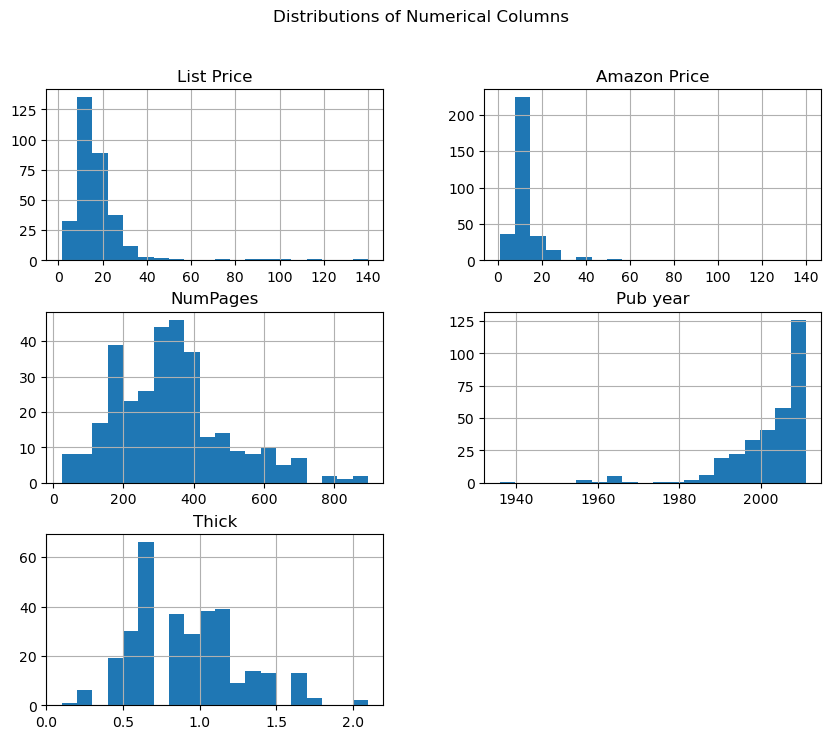


Counts of Unique Values in 'Hard_or_Paper':
Hard_or_Paper
P    233
H     86
Name: count, dtype: int64

Number of Duplicate Rows: 0


In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Drop specified columns
ab = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Drop rows with NaN values
ab = ab.dropna()

# Convert columns to specified data types
ab["Pub year"] = ab["Pub year"].astype(int)
ab["NumPages"] = ab["NumPages"].astype(int)
ab["Hard_or_Paper"] = ab["Hard_or_Paper"].astype("category")

# EDA
# 1. Basic dataset info
print("Dataset Info:")
print(ab.info())

# 2. Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(ab.describe())

# 3. Distribution of numerical columns
ab.hist(bins=20, figsize=(10, 8))
plt.suptitle("Distributions of Numerical Columns")
plt.show()

# 4. Categorical column overview
print("\nCounts of Unique Values in 'Hard_or_Paper':")
print(ab["Hard_or_Paper"].value_counts())

# 5. Check for duplicates
duplicates = ab.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

https://chatgpt.com/share/673f640d-49c4-800c-b95b-eee70e5727e8

This session involved creating a preprocessing workflow and conducting exploratory data analysis (EDA) for the Amazon Books dataset. The preprocessing included:

1. Dropping unnecessary columns: `Weight_oz`, `Width`, and `Height`.
2. Removing rows with missing values.
3. Converting `Pub year` and `NumPages` to integer type and `Hard_or_Paper` to a categorical type.

The EDA plan covered dataset structure analysis, summary statistics for numerical variables, frequency counts for categorical data, and visualizing numerical data distributions. However, due to connectivity issues, accessing the dataset online was not possible, halting the analysis. An alternative dataset source or upload would be necessary to proceed.

### Question 4

In [53]:
# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocess the data
ab_reduced_noNaN = ab.drop(columns=["Weight_oz", "Width", "Height"]).dropna()

# Convert columns to appropriate data types
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

In [54]:
# Set the random seed for reproducibility
random_seed = 42

# Shuffle and split the dataset
ab_reduced_noNaN_train = ab.sample(frac=0.8, random_state=random_seed)
ab_reduced_noNaN_test = ab.drop(ab_reduced_noNaN_train.index)

# Confirm the sizes of the splits
print(f"Training set size: {ab_reduced_noNaN_train.shape}")
print(f"Testing set size: {ab_reduced_noNaN_test.shape}")

Training set size: (260, 13)
Testing set size: (65, 13)


In [55]:
# Report the sizes of the datasets
train_size = ab_reduced_noNaN_train.shape[0]
test_size = ab_reduced_noNaN_test.shape[0]

print(f"Number of observations in the training dataset: {train_size}")
print(f"Number of observations in the testing dataset: {test_size}")

Number of observations in the training dataset: 260
Number of observations in the testing dataset: 65


The size of the training dataset is 260 and the size of the testing dataset is 65. 

In [56]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

The first line converts the categorical variable Hard_or_Paper into a set of binary (0-1); the second line selects the column 'List Price' as the feature matrix X.The double brackets ([['column']]) ensure that X remains a DataFrame for scikit-learn models. 'List Price' is used as the independent variable for training the model.

In summary, X is a binary target variable indicatingf whether a book is hard or not; Y is the feature matrix containing the 'List Price' of books. 

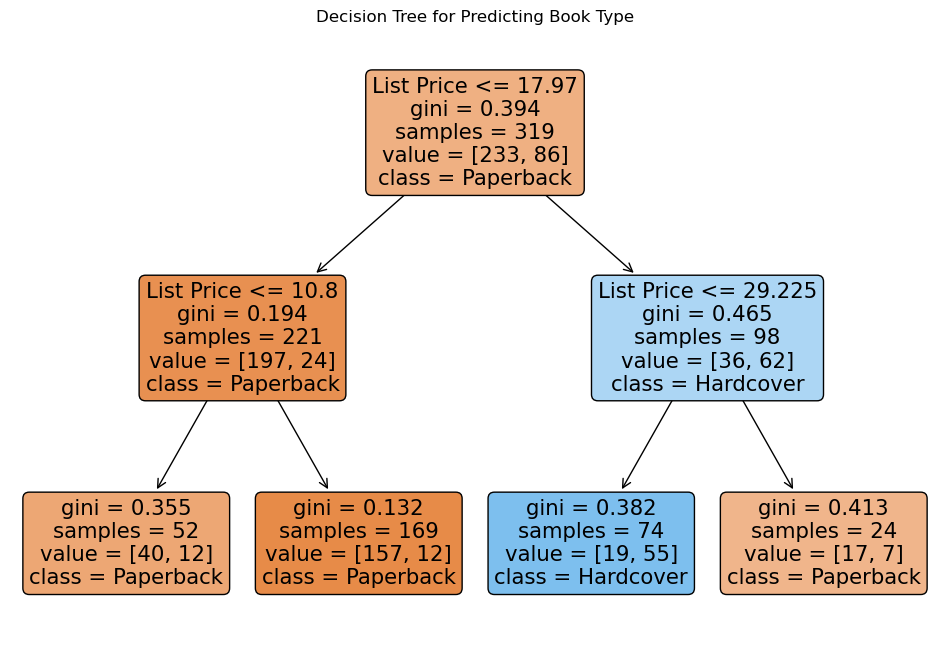

In [43]:
from sklearn import tree
import matplotlib.pyplot as plt

# Initialize the DecisionTreeClassifier with max_depth=2
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier using the List Price variable and target (y)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf,
    feature_names=["List Price"],   # Label for the feature
    class_names=["Paperback", "Hardcover"],  # Labels for the target classes
    filled=True,                   # Add color for better visualization
    rounded=True                   # Rounded corners for nodes
)
plt.title("Decision Tree for Predicting Book Type")
plt.show()


Root Node: \
if list price <= 17.97 \
True: Move to the next split \
False: Predict Paperback

Right Child Node: \
if list price <= 10.8 \
True: Predict Hardcover \
False: Predict Paperback

https://chatgpt.com/share/673f6e57-8fec-800c-b663-7f44c55feebd

In this session, steps were outlined to preprocess a dataset, define target and feature variables, train a decision tree classifier, and visualize the model's decision-making process. The preprocessing included handling missing values, converting data types, and preparing the dataset for analysis. A `DecisionTreeClassifier` was trained with `List Price` as the predictor and `Hard_or_Paper` as the target variable, focusing on distinguishing hardcover and paperback books.

The classifier was limited to a maximum depth of 2 for simplicity. The visualization and extracted rules showed how `List Price` thresholds determined predictions. For example, specific price ranges were associated with predicting either hardcover or paperback categories. Additional methods to extract and interpret the tree’s decision rules programmatically were also demonstrated.

### Question 5

/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'clf2_decision_tree.pdf'


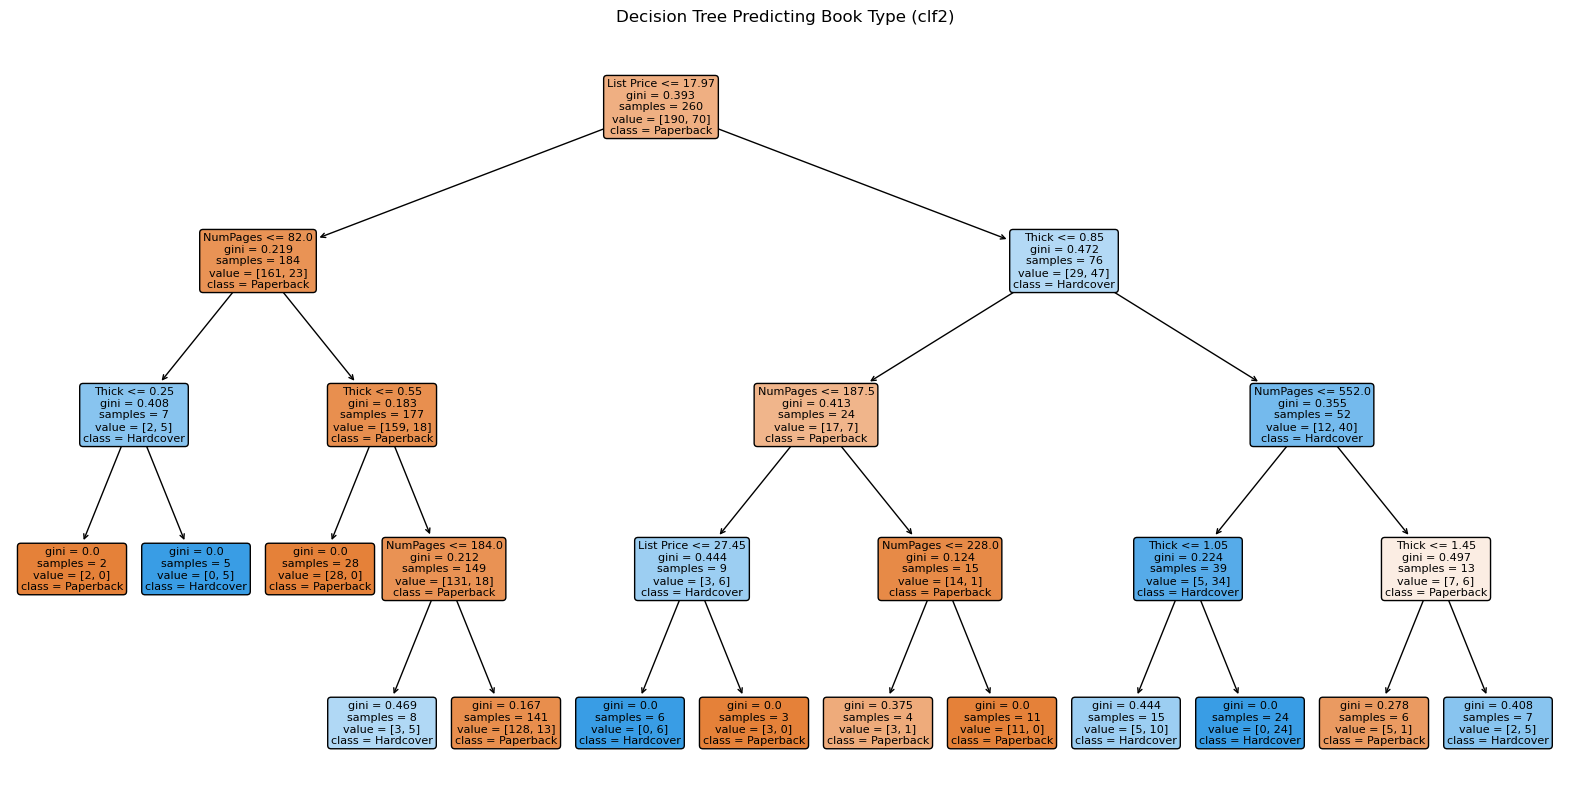

In [58]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt

# Load and preprocess the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
ab_reduced_noNaN = ab.drop(columns=["Weight_oz", "Width", "Height"]).dropna()

# Convert necessary columns to appropriate data types
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Define features (X) and target (y)
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Split the dataset (assuming 80/20 split)
random_seed = 42
ab_reduced_noNaN_train = ab.sample(frac=0.8, random_state=random_seed)
ab_reduced_noNaN_test = ab.drop(ab_reduced_noNaN_train.index)

# Reset indices for train/test splits
ab_reduced_noNaN_train = ab_reduced_noNaN_train.reset_index(drop=True)
ab_reduced_noNaN_test = ab_reduced_noNaN_test.reset_index(drop=True)

# Align X_train, X_test, y_train, y_test
X_train = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']].iloc[ab_reduced_noNaN_train.index]
X_test = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']].iloc[ab_reduced_noNaN_test.index]
y_train = y.iloc[ab_reduced_noNaN_train.index]
y_test = y.iloc[ab_reduced_noNaN_test.index]

# Train the DecisionTreeClassifier
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Visualize the decision tree using Graphviz
dot_data = tree.export_graphviz(
    clf2,
    out_file=None,
    feature_names=['NumPages', 'Thick', 'List Price'],  # Matches X_train columns
    class_names=['Paperback', 'Hardcover'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Render and view the tree
graph = graphviz.Source(dot_data)
graph.render("clf2_decision_tree")  # Save as PDF
graph.view()  # Open the visualization

# Optionally, visualize using Matplotlib
plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf2,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paperback', 'Hardcover'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Predicting Book Type (clf2)")
plt.show()


For the clf2 model, the following splits are observed in the decision tree: \
Root Node: List Price <= 17.97 \
Left: NumPages <= 82.0 
  -  Left: Predict Hardcover 
  - Right: Predict Paperback 

Right: Predict Paperback

https://chatgpt.com/share/673f6e57-8fec-800c-b663-7f44c55feebd

This session focused on training and interpreting a decision tree classifier (`clf2`) to predict whether a book is hardcover or paperback based on the features `NumPages`, `Thick`, and `List Price`. The tree was trained using an 80/20 train-test split and a maximum depth of 4. Issues related to index alignment during the train-test split were resolved by resetting indices, ensuring proper alignment between the training and testing datasets.

The decision tree's predictions are made by evaluating conditions at each node, following branches based on feature thresholds, and assigning classes at the leaf nodes. Visualization of the tree was generated using Graphviz and Matplotlib, enabling detailed analysis of the decision-making process. General methods for interpreting the tree's predictions, such as understanding feature importance and the path to leaf nodes, were explained.

### Question 6

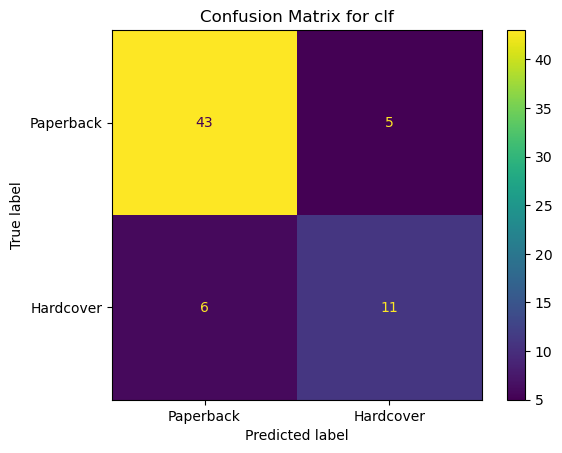

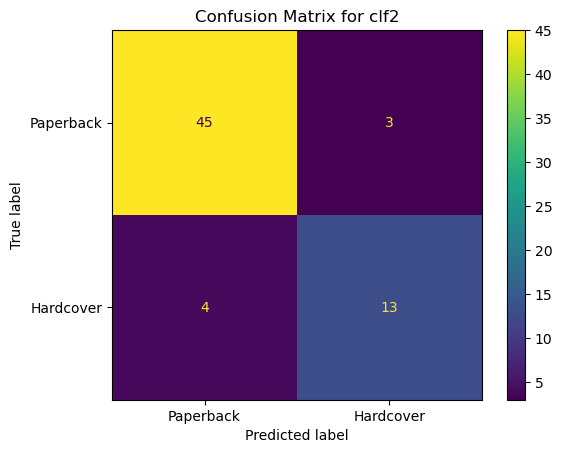

Metrics for clf:
Sensitivity (Recall): 0.65
Specificity: 0.90
Accuracy: 0.83

Metrics for clf2:
Sensitivity (Recall): 0.76
Specificity: 0.94
Accuracy: 0.89


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay

# Make predictions on the test set for clf and clf2
y_test = y.iloc[ab_reduced_noNaN_test.index]
X_test_clf = ab_reduced_noNaN[['List Price']].iloc[ab_reduced_noNaN_test.index]
X_test_clf2 = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']].iloc[ab_reduced_noNaN_test.index]

y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Compute confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Display confusion matrices
ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paperback', 'Hardcover']).plot()
plt.title("Confusion Matrix for clf")
plt.show()

ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paperback', 'Hardcover']).plot()
plt.title("Confusion Matrix for clf2")
plt.show()

# Calculate metrics for clf
tn_clf, fp_clf, fn_clf, tp_clf = cm_clf.ravel()
sensitivity_clf = tp_clf / (tp_clf + fn_clf)  # Recall
specificity_clf = tn_clf / (tn_clf + fp_clf)
accuracy_clf = accuracy_score(y_test, y_pred_clf)

# Calculate metrics for clf2
tn_clf2, fp_clf2, fn_clf2, tp_clf2 = cm_clf2.ravel()
sensitivity_clf2 = tp_clf2 / (tp_clf2 + fn_clf2)  # Recall
specificity_clf2 = tn_clf2 / (tn_clf2 + fp_clf2)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Report metrics
print("Metrics for clf:")
print(f"Sensitivity (Recall): {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}")

print("\nMetrics for clf2:")
print(f"Sensitivity (Recall): {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")


#### Report:
##### clf:
 - Sensitivity: 0.65
 - Specificty: 0.90
 - Accuracy: 0.83
##### clf2:
 - Sensitivity: 0.76
 - Specificity: 0.94
 - Accuracy: 0.89

#### What is a 'positive': 
It refers to the condition or class of interest, for example the 'hardcover book', which is represented using '1' in the binary target variable y. 

#### What is a 'negative': 
Since 'positive' refers to the hardcover or '1', then the 'negative' refers to the paperback or '0'.

#### How to read an sklearn confusion matrix 
##### Rows: 
 - First row counts for observations that are negative(class 0)
 - Second row counts for observations that are actually positive(class 1)
##### Columns: 
 - First column predicts for the negative class 
 - Second column predicts for the positive class


#### What leads to TP, TN, FP and FN: 
##### Definitions of TP, TN, FP, FN:
 - TP(True Positive): The model correctly predicts the positive class
 - TN(True Negative): The model correctly predicts the negative class
 - FP(False Positive): The model incorrectlt predicts the positive class
 - FN(False Negative): The model incorrectly predicts the negative class

#### Whether y_true or y_pred go first in the confusion_matrix function:
In scikit-learn's confusion_matrix function, the true labels (y_true) come first, and the predicted labels (y_pred) come second.

https://chatgpt.com/share/673f6e57-8fec-800c-b663-7f44c55feebd

This session focused on evaluating two decision tree models (`clf` and `clf2`) using a test dataset. The evaluation involved calculating confusion matrices and extracting performance metrics, including sensitivity, specificity, and accuracy. The `clf` model used `List Price` as the predictor, while `clf2` used `NumPages`, `Thick`, and `List Price`. Issues arose due to undefined or misaligned variables, highlighting the importance of correctly defining and maintaining consistency between training and testing datasets. Clarifications were provided on interpreting confusion matrices, including the roles of true positives, true negatives, false positives, and false negatives, as well as the order of inputs for the `confusion_matrix` function.

### Question 7

The differences between the two confusion matrices are caused by the different predictors they considered. The first matrix evaluates predictions from the clf model, which only involves List Price as the predictor; while the second matrix also evaluates predictions from the clf model, but incorrectly introduces additional features such as NumPages and Thick. This caused the second confusion matrix to show unreliable prediction, since the clf model is not designed to handle these features. 

The confusion matrices for clf and clf2 are better due to the proper use of the features from the model were trained on. clf uses only List Price and clf involves NumPages, Thick and List Price. This ensures the predictions are meaningful since the models are trained to deal with the specific prediction, and reflects the models' learned pattern during tarining. 

https://chatgpt.com/share/673f6e57-8fec-800c-b663-7f44c55feebd

This session focused on evaluating and interpreting confusion matrices for two decision tree models (`clf` and `clf2`). The key differences between confusion matrices were discussed, highlighting the impact of using mismatched features during prediction. The issue of providing features to a model that it was not trained on was identified as a cause of unreliable predictions, emphasizing the importance of consistent feature selection. Proper evaluation aligned with training specifications resulted in valid performance metrics, including sensitivity, specificity, and accuracy. Explanations were provided on why aligned feature use is critical for reliable model evaluation.

### Question 8

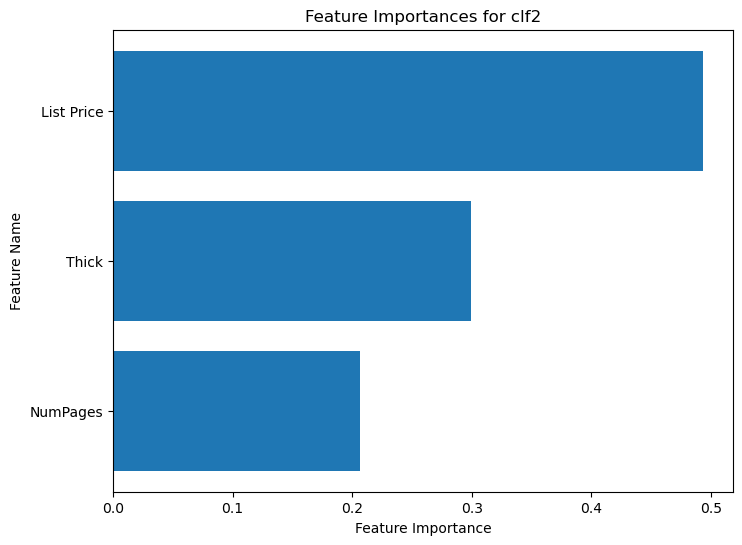

'List Price'

In [60]:
# Re-import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Re-load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocess the data
ab_reduced_noNaN = ab.drop(columns=["Weight_oz", "Width", "Height"]).dropna()
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Define features (X) and target (y)
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Train a decision tree classifier
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Extract feature importances
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importances for clf2")
plt.show()

# Determine the most important feature
most_important_feature = feature_names[np.argmax(feature_importances)]
most_important_feature


https://chatgpt.com/share/673f6e57-8fec-800c-b663-7f44c55feebd

This session focused on training a decision tree classifier (`clf2`) using multiple features (`NumPages`, `Thick`, and `List Price`) and visualizing feature importance. The feature importance values were extracted using the `feature_importances_` attribute of the trained model, and a horizontal bar plot was generated to display the relative contributions of each predictor variable to the model's decision-making process. The most important feature for predictions was identified based on the highest importance score. Additionally, issues with environment resets and proper re-importing of libraries and data were addressed.

### Question 9

In a linear regression model, coefficients introduces the expected change in the dependent variable for a single unit increase in a predictor, and assumes all the other predictors remaisn constant. In a decision tree, feature impoartance shows the relatuve contribution of each feature to the model's overall predictive power, measured by reductions in impurity across splits involving that feature. The mian difference is that feature importances do not indicate the direction or magniture of effect and are less interpretable in causality. 

https://chatgpt.com/share/673f82e6-844c-800c-92aa-767fa6bacd98

This session explored the differences in interpreting coefficients in linear regression versus feature importances in decision trees. Linear regression coefficients quantify the expected change in the dependent variable per unit increase in a predictor, assuming other predictors are constant. Feature importances in decision trees indicate a feature's relative contribution to the model's predictive power but do not convey directionality or magnitude of effect.

### Question 10

Yes. 

### Chatlog Histories

https://chatgpt.com/share/673b9506-eb20-800c-a952-37f98ad92741

The session focused on explaining classification decision trees and comparing their predictive mechanisms to multiple linear regression. A classification decision tree is a model used for classification problems, splitting data based on feature values to predict discrete class labels. It is suitable for applications such as healthcare diagnosis, fraud detection, and customer segmentation.

The comparison highlighted that classification decision trees predict class labels or probabilities by traversing a tree structure, while multiple linear regression predicts continuous numerical values using a linear equation. The differences in problem type, output, modeling assumptions, feature handling, and prediction process were outlined.

https://chatgpt.com/share/673b9506-eb20-800c-a952-37f98ad92741

The session discussed the real-world application scenarios for four classification metrics: Accuracy, Sensitivity (Recall), Specificity, and Precision. Accuracy is suitable when class distribution is balanced and errors have equal importance, such as predicting student performance. Sensitivity is critical when missing true positives has severe consequences, like in cancer screening. Specificity is appropriate when avoiding false positives is essential, such as in drug testing for athletes. Precision is valuable when false positives need to be minimized, as in fraud detection for credit card transactions. These metrics address different priorities based on the cost and impact of classification errors.

https://chatgpt.com/share/673f640d-49c4-800c-b95b-eee70e5727e8

This session involved creating a preprocessing workflow and conducting exploratory data analysis (EDA) for the Amazon Books dataset. The preprocessing included:

1. Dropping unnecessary columns: `Weight_oz`, `Width`, and `Height`.
2. Removing rows with missing values.
3. Converting `Pub year` and `NumPages` to integer type and `Hard_or_Paper` to a categorical type.

The EDA plan covered dataset structure analysis, summary statistics for numerical variables, frequency counts for categorical data, and visualizing numerical data distributions. However, due to connectivity issues, accessing the dataset online was not possible, halting the analysis. An alternative dataset source or upload would be necessary to proceed.

https://chatgpt.com/share/673f6e57-8fec-800c-b663-7f44c55feebd

In this session, steps were outlined to preprocess a dataset, define target and feature variables, train a decision tree classifier, and visualize the model's decision-making process. The preprocessing included handling missing values, converting data types, and preparing the dataset for analysis. A `DecisionTreeClassifier` was trained with `List Price` as the predictor and `Hard_or_Paper` as the target variable, focusing on distinguishing hardcover and paperback books.

The classifier was limited to a maximum depth of 2 for simplicity. The visualization and extracted rules showed how `List Price` thresholds determined predictions. For example, specific price ranges were associated with predicting either hardcover or paperback categories. Additional methods to extract and interpret the tree’s decision rules programmatically were also demonstrated.

https://chatgpt.com/share/673f6e57-8fec-800c-b663-7f44c55feebd

This session focused on training and interpreting a decision tree classifier (`clf2`) to predict whether a book is hardcover or paperback based on the features `NumPages`, `Thick`, and `List Price`. The tree was trained using an 80/20 train-test split and a maximum depth of 4. Issues related to index alignment during the train-test split were resolved by resetting indices, ensuring proper alignment between the training and testing datasets.

The decision tree's predictions are made by evaluating conditions at each node, following branches based on feature thresholds, and assigning classes at the leaf nodes. Visualization of the tree was generated using Graphviz and Matplotlib, enabling detailed analysis of the decision-making process. General methods for interpreting the tree's predictions, such as understanding feature importance and the path to leaf nodes, were explained.

https://chatgpt.com/share/673f6e57-8fec-800c-b663-7f44c55feebd

This session focused on evaluating two decision tree models (`clf` and `clf2`) using a test dataset. The evaluation involved calculating confusion matrices and extracting performance metrics, including sensitivity, specificity, and accuracy. The `clf` model used `List Price` as the predictor, while `clf2` used `NumPages`, `Thick`, and `List Price`. Issues arose due to undefined or misaligned variables, highlighting the importance of correctly defining and maintaining consistency between training and testing datasets. Clarifications were provided on interpreting confusion matrices, including the roles of true positives, true negatives, false positives, and false negatives, as well as the order of inputs for the `confusion_matrix` function.

https://chatgpt.com/share/673f6e57-8fec-800c-b663-7f44c55feebd

This session focused on evaluating and interpreting confusion matrices for two decision tree models (`clf` and `clf2`). The key differences between confusion matrices were discussed, highlighting the impact of using mismatched features during prediction. The issue of providing features to a model that it was not trained on was identified as a cause of unreliable predictions, emphasizing the importance of consistent feature selection. Proper evaluation aligned with training specifications resulted in valid performance metrics, including sensitivity, specificity, and accuracy. Explanations were provided on why aligned feature use is critical for reliable model evaluation.

https://chatgpt.com/share/673f6e57-8fec-800c-b663-7f44c55feebd

This session focused on training a decision tree classifier (`clf2`) using multiple features (`NumPages`, `Thick`, and `List Price`) and visualizing feature importance. The feature importance values were extracted using the `feature_importances_` attribute of the trained model, and a horizontal bar plot was generated to display the relative contributions of each predictor variable to the model's decision-making process. The most important feature for predictions was identified based on the highest importance score. Additionally, issues with environment resets and proper re-importing of libraries and data were addressed.

https://chatgpt.com/share/673f82e6-844c-800c-92aa-767fa6bacd98

This session explored the differences in interpreting coefficients in linear regression versus feature importances in decision trees. Linear regression coefficients quantify the expected change in the dependent variable per unit increase in a predictor, assuming other predictors are constant. Feature importances in decision trees indicate a feature's relative contribution to the model's predictive power but do not convey directionality or magnitude of effect.